# Week 4 - Inheritance and abstraction. Graphical User Interfaces (GUIs)


## Learning Objectives

* Describe inheritance in the context of object oriented programming
* List situations in which inheritance is useful
* Create an abstract class
* Contrast control abstraction with data abstraction
* Implement a simple graphic user interface

Last week we looked at several example projects and the classes we might use to implement them.

###Example 1: A Laboratory Inventory

I would like to keep track of all the __items__ in the __laboratory__ so I can easily find them the next time I need them. Both __equipment__ and __consumables__ would be tracked. We have multiple __rooms__, and items can be on __shelves__, in __refrigerators__, in __freezers__, etc. Items can also be in __boxes__ containing other items in all these places.

The words in __bold__ would all be good ideas to turn into classes. Now we know some of the classes we will need we can start to think about what each of these classes should do, what the methods will be. Let's consider the consumables class:

For consumables we will need to manage their use so there should be an initial quantity and a quantity remaining that is updated every time we use some. We want to make sure that temperature sensitive consumables are always stored at the correct temperature, and that flammables are stored in a flammables cabinet etc.

The consumable class will need a number of attributes:

* Initial quantity
* Current quantity
* Storage temperature
* Flammability

The consumable class will need methods to:

* Update the quantity remaining
* Check for improper storage?

The consumable class might interact with the shelf, refrigerator, freezer, and/or box classes.

Reading back through our description of consumables there is reference to a flammables cabinet that was not mentioned in our initial description of the problem. This is an iterative design process so we should go back and add a flammables cabinet class. 

If we expand our list to all the classes we plan to use we get the following:

* __Items__
  * Attributes
    * Name
    * Description
    * Location
  * Methods
    * Update location
  * Interactions
    * Every other class except items and consumables
* __Laboratory__
  * Attributes
    * ?
  * Methods
    * Search
  * Interactions
    * Every other class
* __Equipment__
  * Attributes
    * Name
    * Description
    * Location
  * Methods
    * Update location
  * Interactions
    * Every other class except items and consumables
* __Consumables__
  * Attributes
    * Name
    * Description
    * Location
    * Initial quantity
    * Current quantity
    * Storage temperature
    * Flammability
  * Methods
    * Update location
    * Update quantity remaining
    * Check for appropriate storage
  * Interactions
    * Every other class except equipment and items
* __Rooms__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class
* __Shelves__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class possible although refrigerator and freezer are unlikely
* __Refrigerators__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
    * Temperature
  * Methods
    * Search
  * Interactions
    * Every other class possible although freezer and flammables cabinet unlikely
* __Freezers__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
    * Temperature
  * Methods
    * Search
  * Interactions
    * Every other class possible although refrigerator and flammables cabinet unlikely
* __Boxes__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class
* __Flammables Cabinet__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class possible although refrigerator and freezer unlikely

Although this is a long list careful examination reveals that there is a lot of repetition.

Items and equipment are identical and consumables is similar, adding several extra attributes and methods.

Rooms, shelves, refrigerators, freezers, boxes and flammables cabinet are all similar, only differing in the occasional attribute.

Our three main groups are:
* Laboratory
* Items (Items, equipment, and consumables)
* Locations (Rooms, shelves, refrigerators, freezers, boxes and flammables cabinet)

So much duplication is problematic, it is diffcult to maintain and subject to greater risk of bugs. 

There is a better way - we can create a generic class with the shared functionality and then __inherit__ from it when we create the other classes.

For example an Item class would contain the basic attributes and methods. The Equipment class could then inherit from this class without modification. The Consumable class would also inherit from Item and only add the extra attributes and methods uniquely need by the Consumable class.

In [1]:
class Item(object):
    
    
    def __init__(self, name, description, location):
        self.name = name
        self.description = description
        self.location = location
        
        
    def update_location(self, new_location):
        pass

class Equipment(Item):
    pass

class Consumable(Item):
    
    
    def __init__(self, name, description, location, initial_quantity, current_quantity, storage_temp, flammability):
        self.name = name
        self.description = description
        self.location = location
        self.initial_quantity = initial_quantity
        self.current_quantity = current_quantity
        self.flammability = flammability
        
        
    def update_quantity_remaining(self, amount):
        pass

There is one other situation we should consider. Occasionally we will want a class of a particular type to always implement a particular method even though we are unable to implement that method in our parent class. We need some way of raising an error when the parent class is inherited and the method is not implemented.

As a simple example consider a class representing length. We might create classes for meters, miles, feet, etc. Keeping the original units when performing operations (adding, subtracting, etc) would prevent rounding errors but each class would need custom logic.

Returning to our laboratory inventory system one way we can implement this is below:

In [18]:
class Item(object):
    def safely_stored(self):
        raise NotImplementedError('override in subclass')
        
class Consumable(Item):
    def safely_stored(self):
        return True

In [19]:
a = Item()

In [4]:
a.safely_stored()

NotImplementedError: override in subclass

In [23]:
b = Consumable()

In [24]:
b.safely_stored()

True

A disadvantage with this approach is we only see the error message when we call the method. The error is in the way we implemented the class so it would be more intuitive to get an error earlier, when we first create the object.

This can be achieved using the [abstract method decorator](https://docs.python.org/3.5/library/abc.html).

In [16]:
from abc import ABCMeta, abstractmethod

class Item(metaclass=ABCMeta):
    @abstractmethod
    def safely_stored(self):
        pass

class Consumable(Item):
    def safely_stored(self):
        return True

In [17]:
a = Item()

TypeError: Can't instantiate abstract class Item with abstract methods safely_stored

In [9]:
b = Consumable()
b.safely_stored()

True

Either of these approaches work well for adding new methods or completely changing the behaviour of a method. Often we only need to make a more subtle change. In this situation it can be useful to call a method from a parent class while only implementing our new functionality in the child class.


There are two approaches for this.

In [10]:
class A(object):
    def a(self):
        print('a in class A')

class B(A):
    def a(self):
        A.a(self)
        print('b in class B')

a = A()
a.a()

b = B()
b.a()

a in class A
a in class A
b in class B


In [11]:
class A(object):
    def a(self):
        print('a in class A')

class B(A):
    def a(self):
        super().a()
        print('b in class B')

a = A()
a.a()

b = B()
b.a()

a in class A
a in class A
b in class B


Using super() is usually the best approach, the reasons for this are covered in detail in [this blog post](https://rhettinger.wordpress.com/2011/05/26/super-considered-super/)

## Multiple Inheritance

We are not limited to inheriting from a single class. It is possible to merge functionality from multiple different classes simply by inheriting from them.

When inheriting from multiple classes that contain a method or attribute with the same name there is a particular order in which the names are resolved.

In [12]:
class A(object):
    def a(self):
        print('A-a')

class A2(object):
    def a(self):
        print('A2-a')

class B(A, A2): # first object method is inherited
    pass

a = A()
a.a()

a2 = A2()
a2.a()

b = B()
b.a()

A-a
A2-a
A-a


In [21]:
class A(object):
    def a(self):
        print('A-a')

class A2(object):
    def a(self):
        print('A2-a')

class B(A):
    pass

class C(B, A2):
    pass

a = A()
a.a()

a2 = A2()
a2.a()

c = C()
c.a()

A-a
A2-a
A-a


A simple rule-of-thumb is that search is depth first. [The details](https://en.wikipedia.org/wiki/C3_linearization) are a little more complicated.

## isinstance

Often we need to check whether a particular variable is an instance of a particular class. For example, returning to our laboratory inventory system we would want to check that we only add instances of `Item` or its subclasses to our storage locations.

In [21]:
isinstance(a, Item)

True

In [25]:
isinstance(b, Consumable)

True

In [26]:
isinstance(b, Item)

True

In [27]:
isinstance(a, Consumable)

False

##Duck typing

A popular alternative in python is duck typing, an approach named after the idea that,

`If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck.`

What this means for programming is that instead of checking for a particular class, instead the methods and attributes that are actually needed are checked for.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

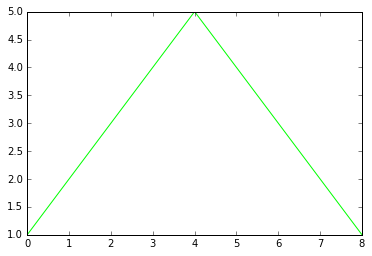

In [33]:
plt.plot([1,2,3,4,5,4,3,2,1], color=(0,1,0)) #can substitute a tuple instead of a string, duck typing

## Graphical User Interfaces

Object oriented programming and particularly inheritance is commonly used for creating GUIs. There are [a large number](https://wiki.python.org/moin/GuiProgramming) of different frameworks supporting building GUIs. The following are particularly relevant:

* [TkInter](https://docs.python.org/3.5/library/tkinter.html) - This is the official/default GUI framework
* [guidata](https://pythonhosted.org/guidata/) - A GUI framework for dataset display and editing
* [VTK](http://www.vtk.org/) - A GUI framework for data visualization
* [pyqtgraph](http://www.pyqtgraph.org/documentation/index.html) - A GUI framework for data visualization, easily installed with `conda install pyqtgraph`
* [matplotlib](http://matplotlib.org/) - As well as creating plots matplotlib can support interaction